In [1]:
import numpy as np 
import pandas as pd
import itertools
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
#Read data
DATA_PATH = '../data-preprocessing/VinhLong_data.csv'
data = pd.read_csv(DATA_PATH)

#Filter unappropriate data
data = data[data['Nhiệt độ'] <= 60]
data.head()

,Ngày,Giờ,Nhiệt độ,Độ ẩm,Khí áp,T.độ gió,H. gió
0,01/01/2014,01:00,22.2,89,1013.7,1.3,225
1,01/01/2014,02:00,21.8,90,1012.9,1,270
2,01/01/2014,03:00,22.8,80,1012.5,3.1,320
3,01/01/2014,04:00,22.7,80,1012.5,1.2,235
4,01/01/2014,05:00,22.0,84,1012.5,3.7,319


Exploratory Data Analysis

In [3]:
data.shape

(84589, 7)

In [4]:
data['Ngày'] = pd.to_datetime(data['Ngày'], format='%d/%m/%Y')
data['Giờ'] = pd.to_datetime(data['Giờ'], format='%H:%M').dt.time
data['Datetime'] = pd.to_datetime(data['Ngày'].astype(str) + ' ' + data['Giờ'].astype(str))
data.drop(['Ngày', 'Giờ'], axis=1, inplace=True)
data.head()

,Nhiệt độ,Độ ẩm,Khí áp,T.độ gió,H. gió,Datetime
0,22.2,89,1013.7,1.3,225,2014-01-01 01:00:00
1,21.8,90,1012.9,1,270,2014-01-01 02:00:00
2,22.8,80,1012.5,3.1,320,2014-01-01 03:00:00
3,22.7,80,1012.5,1.2,235,2014-01-01 04:00:00
4,22.0,84,1012.5,3.7,319,2014-01-01 05:00:00


In [5]:
data.dtypes

Nhiệt độ           float64
Độ ẩm               object
Khí áp              object
T.độ gió            object
H. gió              object
Datetime    datetime64[ns]
dtype: object

In [6]:
data=data.set_index('Datetime')
data.tail()

,Nhiệt độ,Độ ẩm,Khí áp,T.độ gió,H. gió
Datetime,,,,,
2024-01-16 00:00:00,25.1,84,1012,0,-
2024-01-16 01:00:00,24.9,84,1011.6,0,-
2024-01-18 17:00:00,31.6,62,-,0,-
2024-02-21 07:00:00,24.4,97,1012.6,1.4,142
2024-02-21 08:00:00,31.3,100,-,0.2,70


In [7]:
#Drop any rows that have null or 0 values
data.replace('-', np.nan, inplace=True)
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)
data = data.apply(pd.to_numeric, errors='ignore')
data = data[(data != 0).all(1)]
data.tail()

,Nhiệt độ,Độ ẩm,Khí áp,T.độ gió,H. gió
Datetime,,,,,
2024-01-15 19:00:00,28.3,65,1011.8,2.2,154
2024-01-15 20:00:00,27.4,70,1012.1,2.1,152
2024-01-15 21:00:00,27.0,72,1012.5,0.2,149
2024-01-15 22:00:00,26.5,75,1012.2,1.3,153
2024-02-21 07:00:00,24.4,97,1012.6,1.4,142


In [8]:
# Check for any null values in the DataFrame
null_exists = data.isnull().any().any()

print(f"Are there any null values in the data? {'Yes' if null_exists else 'No'}")


Are there any null values in the data? No


In [9]:
data.to_csv('VinhLong-data_preprocess.csv', index=True)

In [10]:
data=data[["Nhiệt độ"]]
data.head()

,Nhiệt độ
Datetime,
2014-01-01 01:00:00,22.2
2014-01-01 02:00:00,21.8
2014-01-01 03:00:00,22.8
2014-01-01 04:00:00,22.7
2014-01-01 05:00:00,22.0


In [11]:
data.shape

(71455, 1)

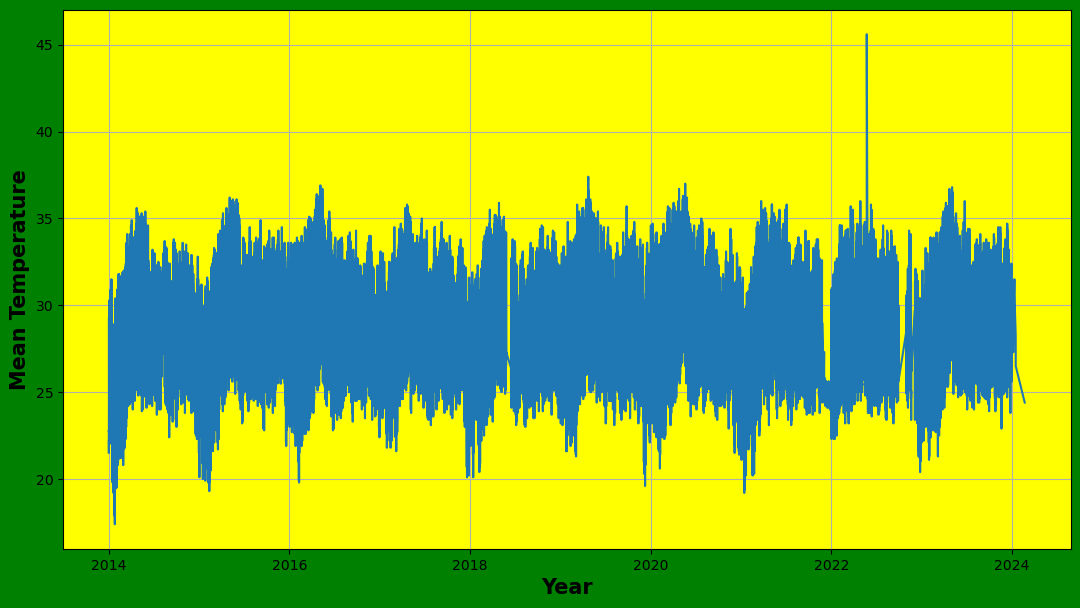

In [12]:
# Convert data to numeric
column_name = 'Nhiệt độ'
data["Nhiệt độ"] = pd.to_numeric(data["Nhiệt độ"], errors='coerce')

# Plot the numeric data
fig = plt.figure(figsize=(13,7), facecolor="green")
ax = plt.axes()
ax.set_facecolor("yellow")
plt.xlabel("Year", fontsize="15", fontweight="bold")
plt.ylabel("Mean Temperature", fontsize="15", fontweight="bold")
plt.grid(True)
plt.plot(data['Nhiệt độ'])
plt.show()

In [13]:
daily_mean=data.groupby(data.index.day).mean()
monthly_mean=data.groupby(data.index.month).mean()
hourly_mean=data.groupby(data.index.hour).mean()
yearly_mean=data.groupby(data.index.year).mean()

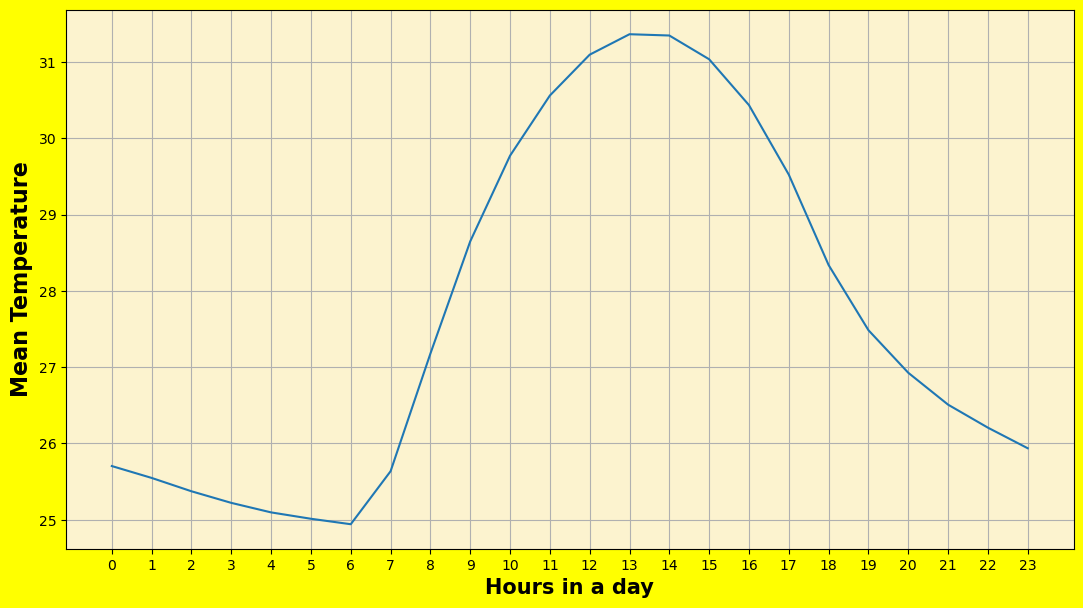

In [14]:
fig=plt.figure(figsize=(13,7),facecolor="yellow")
ax=plt.axes()
ax.set_facecolor("#FCF3CF")
plt.plot(hourly_mean)
plt.grid(True)
plt.xticks(range(0,24))
plt.xlabel("Hours in a day",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

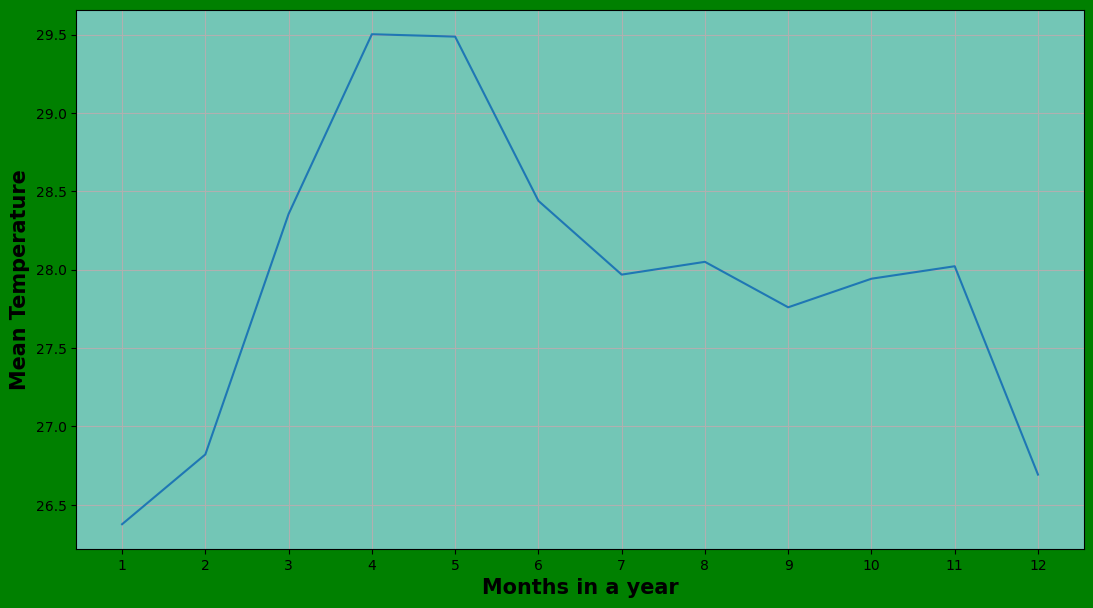

In [15]:
fig=plt.figure(figsize=(13,7),facecolor="green")
ax=plt.axes()
ax.set_facecolor("#73C6B6")
plt.plot(monthly_mean)
plt.grid(True)
plt.xticks(range(1,13))
plt.xlabel("Months in a year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.show()

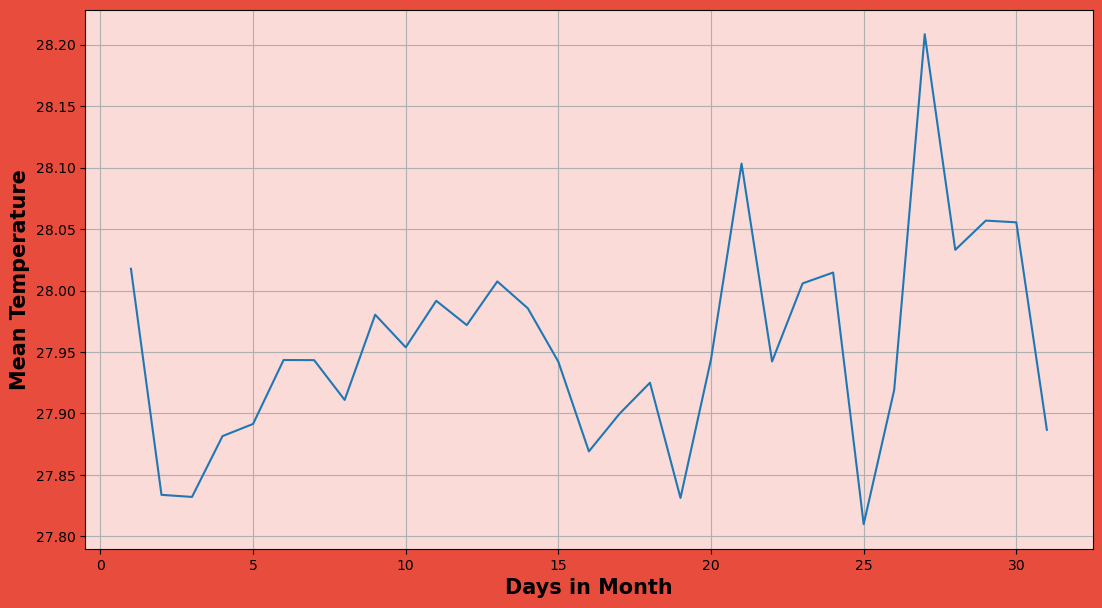

In [16]:
fig=plt.figure(figsize=(13,7),facecolor="#E74C3C")
ax=plt.axes()
ax.set_facecolor("#FADBD8")
plt.plot(daily_mean)
plt.grid(True)
plt.xlabel("Days in Month",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.show()

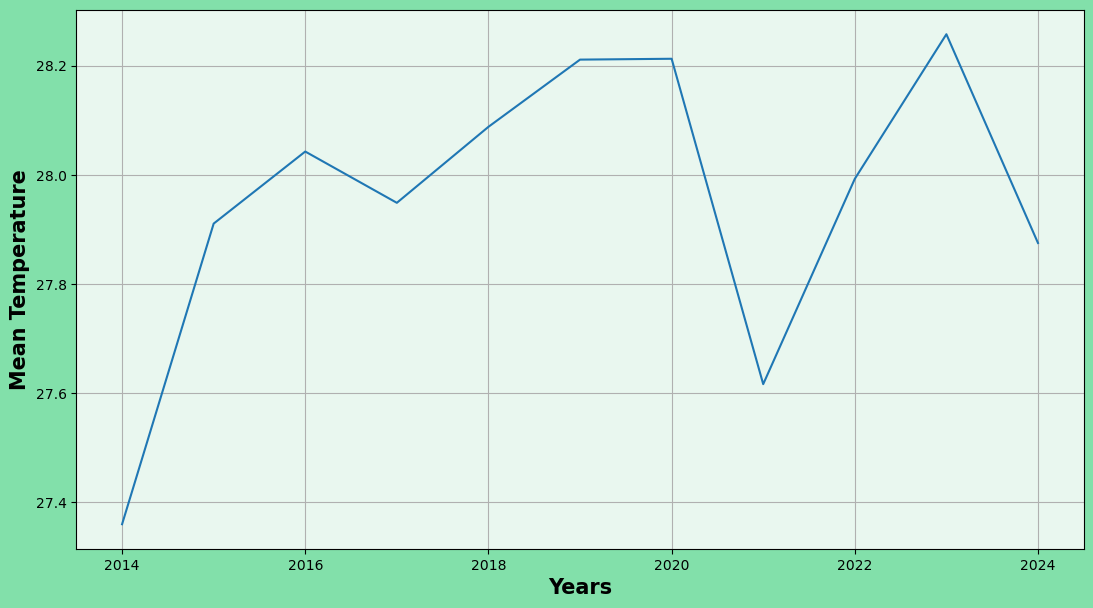

In [17]:
fig=plt.figure(figsize=(13,7),facecolor="#82E0AA")
ax=plt.axes()
ax.set_facecolor("#E9F7EF")
plt.plot(yearly_mean)
plt.grid(True)
plt.xlabel("Years",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.show()

Analysis of Daily Data using Resampling Method

In [18]:
daily=data.resample("D").mean()
print("Sample reduced by {} rows after resampling".format(data.shape[0]-daily.shape[0]))

Sample reduced by 67751 rows after resampling


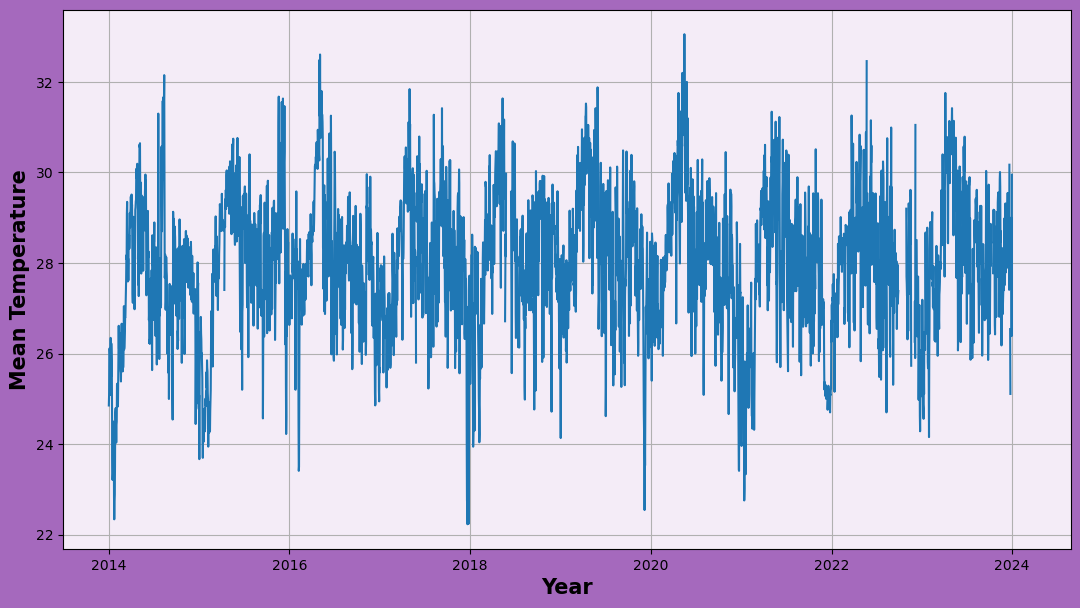

In [19]:
fig=plt.figure(figsize=(13,7),facecolor="#A569BD")
ax=plt.axes()
ax.set_facecolor("#F4ECF7")
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.plot(daily)
plt.show()

*Moving Average to predict daily temperature*

In [20]:
actual=daily["Nhiệt độ"].to_frame().rename(columns={"Nhiệt độ":"actual"})
predicted=daily["Nhiệt độ"].to_frame().shift(1).rename(columns={"Nhiệt độ":"predicted"})

df_daily=pd.concat([actual,predicted],axis=1)

In [31]:
predicted

,predicted
Datetime,
2014-01-01,NaN
2014-01-02,24.852174
2014-01-03,25.071429
2014-01-04,25.713043
2014-01-05,26.113636
...,...
2024-02-17,NaN
2024-02-18,NaN
2024-02-19,NaN


In [21]:
df_daily.head()

,actual,predicted
Datetime,,
2014-01-01,24.852174,NaN
2014-01-02,25.071429,24.852174
2014-01-03,25.713043,25.071429
2014-01-04,26.113636,25.713043
2014-01-05,25.975000,26.113636


In [22]:
df_daily=df_daily[1:]
df_daily.head()


,actual,predicted
Datetime,,
2014-01-02,25.071429,24.852174
2014-01-03,25.713043,25.071429
2014-01-04,26.113636,25.713043
2014-01-05,25.975000,26.113636
2014-01-06,25.083333,25.975000


In [23]:
df_daily.shape

(3703, 2)

In [24]:
df_daily.dropna()

,actual,predicted
Datetime,,
2014-01-02,25.071429,24.852174
2014-01-03,25.713043,25.071429
2014-01-04,26.113636,25.713043
2014-01-05,25.975000,26.113636
2014-01-06,25.083333,25.975000
...,...,...
2023-12-25,25.107692,26.540000
2023-12-28,29.000000,28.400000
2023-12-29,28.840000,29.000000


In [25]:
df_daily.shape

(3703, 2)

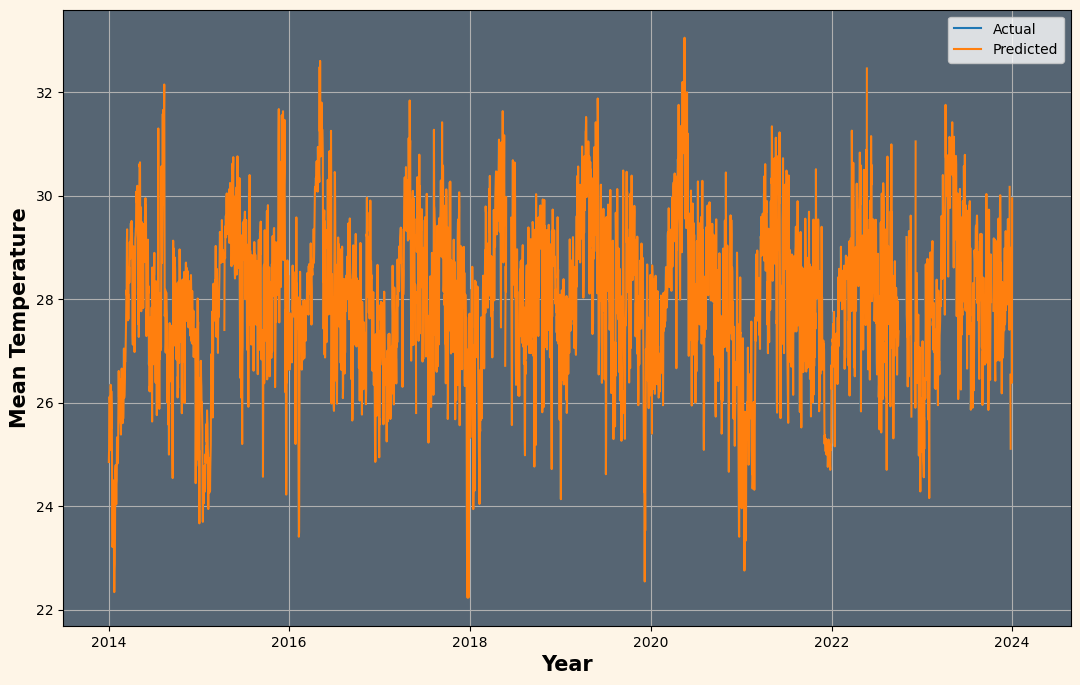

In [26]:
fig=plt.figure(figsize=(13,8),facecolor="#FEF5E7")
ax=plt.axes()
ax.set_facecolor("#566573")
plt.plot(df_daily["actual"],label="Actual")
plt.plot(df_daily["predicted"],label="Predicted")
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.legend(loc="best")
plt.show()

In [27]:
df_daily.dropna(subset=["actual", "predicted"], inplace=True)

rmse=mean_squared_error(df_daily["actual"],df_daily["predicted"],squared=False)
print("RMSE: {:.1f}".format(rmse))

RMSE: 1.0


Analysis of Monthly Data

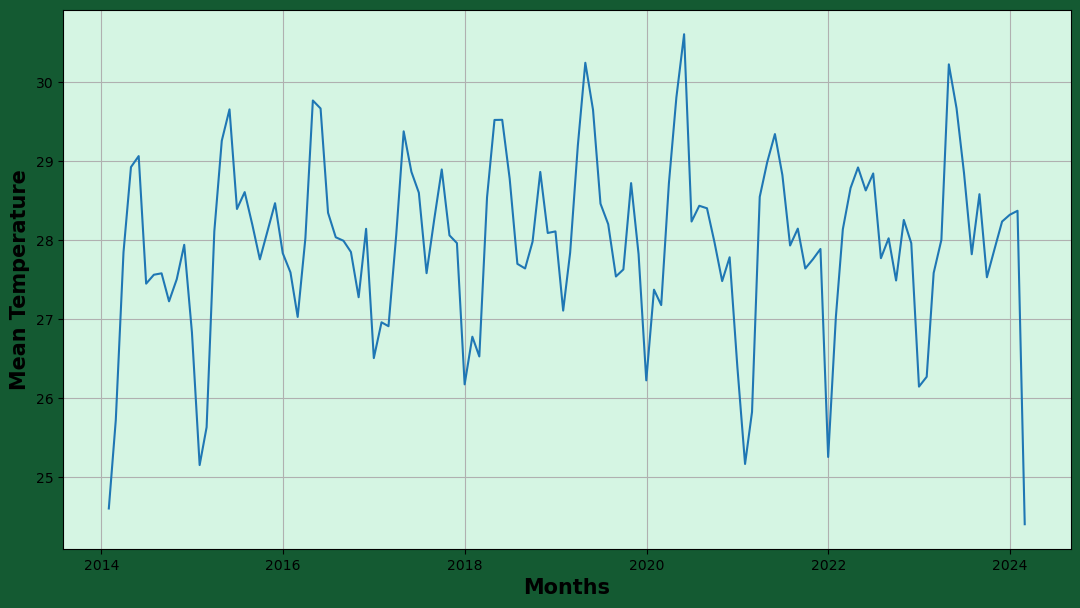

In [28]:
monthly=data.resample("M").mean()
fig=plt.figure(figsize=(13,7),facecolor="#145A32")
ax=plt.axes()
ax.set_facecolor("#D5F5E3")
plt.plot(monthly)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.show()

Components of Time Series Data:

1. Trend: A gradual increase or decrease increase in the of observations(mean & variance) over a long period of time.

2. Seasonality: Repeating/predictable pattern over a certain time period.

3. Residual: (white noise), which generally are the errors which does not account to trend and seasonality.

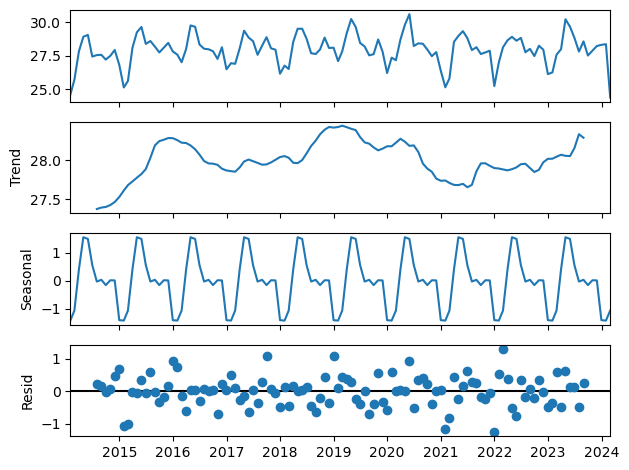

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(monthly)
result.plot()
plt.show()

In [30]:
monthly.head()

,Nhiệt độ
Datetime,
2014-01-31,24.599436
2014-02-28,25.720060
2014-03-31,27.845873
2014-04-30,28.925318
2014-05-31,29.064490
